In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# <font color="blue"> Data Collection and Preprocessing

In [2]:
movie=pd.read_csv("movies.dat", sep= "::", engine="python", encoding="latin-1")
movie.columns =['MovieIDs','MovieName','Category']
movie.dropna(inplace=True)
movie.head()

,MovieIDs,MovieName,Category
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller


In [3]:
ratings=pd.read_csv("ratings.csv", sep= "::", engine="python", encoding="latin-1")
ratings.columns =['ID','MovieID','Ratings','TimeStamp']
ratings.dropna(inplace=True)
ratings.head()

,ID,MovieID,Ratings,TimeStamp
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268


In [4]:
users=pd.read_csv("users.dat", sep= "::", engine="python", encoding="latin-1")
users.columns =['UserID','Gender','Age','Occupation','Zip-code']
users.dropna(inplace=True)
users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117


In [5]:
data = pd.concat([movie, ratings, users], axis=1)
data.head()

,MovieIDs,MovieName,Category,ID,MovieID,Ratings,TimeStamp,UserID,Gender,Age,Occupation,Zip-code
0,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,978302109,2.0,M,56.0,16.0,70072
1,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,978301968,3.0,M,25.0,15.0,55117
2,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,978300275,4.0,M,45.0,7.0,02460
3,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,978824291,5.0,M,25.0,20.0,55455
4,6.0,Heat (1995),Action|Crime|Thriller,1,1197,3,978302268,6.0,F,50.0,9.0,55117


In [6]:
#information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000208 entries, 0 to 1000207
Data columns (total 12 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   MovieIDs    3882 non-null     float64
 1   MovieName   3882 non-null     object 
 2   Category    3882 non-null     object 
 3   ID          1000208 non-null  int64  
 4   MovieID     1000208 non-null  int64  
 5   Ratings     1000208 non-null  int64  
 6   TimeStamp   1000208 non-null  int64  
 7   UserID      6039 non-null     float64
 8   Gender      6039 non-null     object 
 9   Age         6039 non-null     float64
 10  Occupation  6039 non-null     float64
 11  Zip-code    6039 non-null     object 
dtypes: float64(4), int64(4), object(4)
memory usage: 91.6+ MB


In [7]:
#size of the data
data.size

12002496

In [8]:
#shape of the data
data.shape

(1000208, 12)

In [9]:
#checking the null values
data.isnull().any()

MovieIDs       True
MovieName      True
Category       True
ID            False
MovieID       False
Ratings       False
TimeStamp     False
UserID         True
Gender         True
Age            True
Occupation     True
Zip-code       True
dtype: bool

In [10]:
data.isnull().sum()

MovieIDs      996326
MovieName     996326
Category      996326
ID                 0
MovieID            0
Ratings            0
TimeStamp          0
UserID        994169
Gender        994169
Age           994169
Occupation    994169
Zip-code      994169
dtype: int64

In [11]:
data.isna()

,MovieIDs,MovieName,Category,ID,MovieID,Ratings,TimeStamp,UserID,Gender,Age,Occupation,Zip-code
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1000203,True,True,True,False,False,False,False,True,True,True,True,True
1000204,True,True,True,False,False,False,False,True,True,True,True,True
1000205,True,True,True,False,False,False,False,True,True,True,True,True
1000206,True,True,True,False,False,False,False,True,True,True,True,True


In [12]:
#dropping the null values
data.dropna(axis=0,inplace=True)

In [13]:
data

,MovieIDs,MovieName,Category,ID,MovieID,Ratings,TimeStamp,UserID,Gender,Age,Occupation,Zip-code
0,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,978302109,2.0,M,56.0,16.0,70072
1,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,978301968,3.0,M,25.0,15.0,55117
2,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,978300275,4.0,M,45.0,7.0,02460
3,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,978824291,5.0,M,25.0,20.0,55455
4,6.0,Heat (1995),Action|Crime|Thriller,1,1197,3,978302268,6.0,F,50.0,9.0,55117
...,...,...,...,...,...,...,...,...,...,...,...,...
3877,3948.0,Meet the Parents (2000),Comedy,28,334,4,978125960,3879.0,M,25.0,3.0,83687
3878,3949.0,Requiem for a Dream (2000),Drama,28,266,2,978982323,3880.0,M,25.0,7.0,54942
3879,3950.0,Tigerland (2000),Drama,28,2174,3,978126491,3881.0,M,18.0,2.0,44515
3880,3951.0,Two Family House (2000),Drama,28,912,5,978985294,3882.0,M,56.0,14.0,55337


In [14]:
data.isnull().sum()

MovieIDs      0
MovieName     0
Category      0
ID            0
MovieID       0
Ratings       0
TimeStamp     0
UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

# <font color="blue"> Data Analysis

In [15]:
data.describe()

,MovieIDs,ID,MovieID,Ratings,TimeStamp,UserID,Age,Occupation
count,3882.000000,3882.000000,3882.000000,3882.000000,3.882000e+03,3882.000000,3882.000000,3882.000000
mean,1986.560793,16.150696,1802.528336,3.561566,9.785892e+08,1942.500000,30.436888,8.206852
std,1146.483260,7.468681,1079.681961,1.095514,2.281786e+06,1120.781201,13.055439,6.331577
min,2.000000,1.000000,1.000000,1.000000,9.781252e+08,2.000000,1.000000,0.000000
25%,983.250000,10.000000,923.250000,3.000000,9.781535e+08,972.250000,25.000000,3.000000
50%,2010.500000,18.000000,1722.000000,4.000000,9.782245e+08,1942.500000,25.000000,7.000000
75%,2980.750000,23.000000,2692.000000,4.000000,9.782976e+08,2912.750000,35.000000,14.000000
max,3952.000000,28.000000,3952.000000,5.000000,1.009669e+09,3883.000000,56.000000,20.000000


In [16]:
data["Gender"].value_counts()

M    2829
F    1053
Name: Gender, dtype: int64

In [17]:
data["Ratings"].value_counts()

4    1318
3    1099
5     840
2     432
1     193
Name: Ratings, dtype: int64

In [18]:
data.columns

Index(['MovieIDs', 'MovieName', 'Category', 'ID', 'MovieID', 'Ratings',
       'TimeStamp', 'UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'],
      dtype='object')

In [19]:
data=data.drop(['TimeStamp','Occupation', 'Zip-code'],axis=1)
data.head()

,MovieIDs,MovieName,Category,ID,MovieID,Ratings,UserID,Gender,Age
0,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,2.0,M,56.0
1,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,3.0,M,25.0
2,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,4.0,M,45.0
3,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,5.0,M,25.0
4,6.0,Heat (1995),Action|Crime|Thriller,1,1197,3,6.0,F,50.0


In [20]:
data.replace({"Gender":{"M":0,"F":1}},inplace=True)

In [21]:
data.head()

,MovieIDs,MovieName,Category,ID,MovieID,Ratings,UserID,Gender,Age
0,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,2.0,0,56.0
1,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,3.0,0,25.0
2,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,4.0,0,45.0
3,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,5.0,0,25.0
4,6.0,Heat (1995),Action|Crime|Thriller,1,1197,3,6.0,1,50.0


# <font color="blue"> Data Visualization

<Axes: xlabel='Ratings', ylabel='count'>

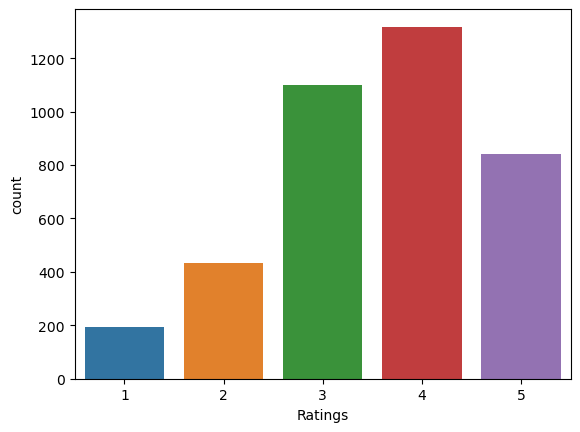

In [22]:
sns.countplot(x="Ratings",data=data)

<Axes: xlabel='Gender', ylabel='count'>

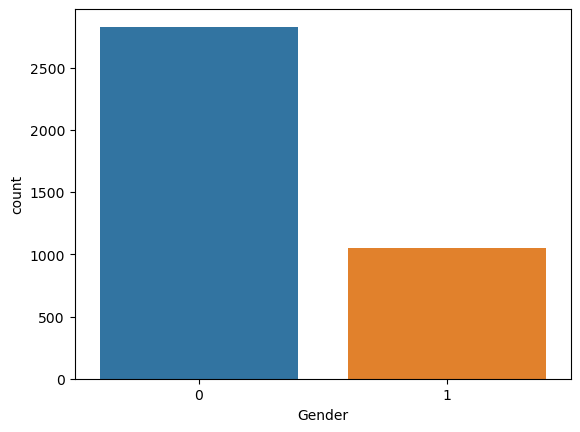

In [23]:
sns.countplot(x="Gender",data=data)

<Axes: xlabel='Gender', ylabel='count'>

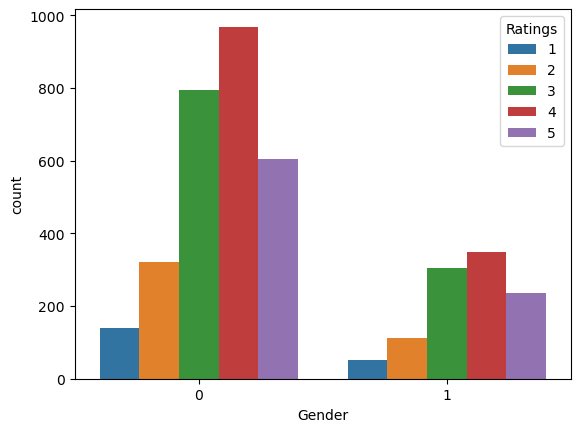

In [24]:
sns.countplot(x="Gender",hue="Ratings",data=data)

Text(0.5, 0, 'Age')

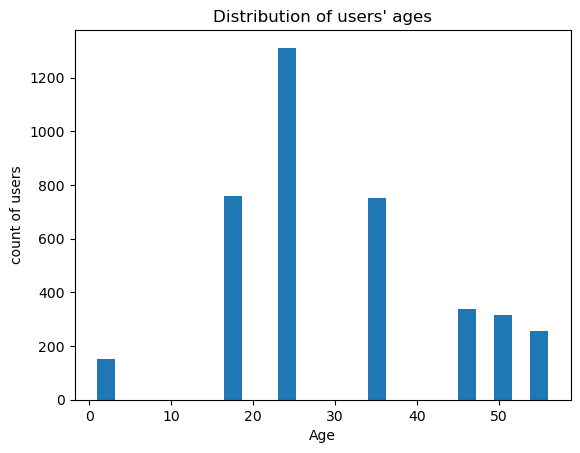

In [25]:
data.Age.plot.hist(bins=25)
plt.title("Distribution of users' ages")
plt.ylabel('count of users')
plt.xlabel('Age')

<Axes: xlabel='Age', ylabel='count'>

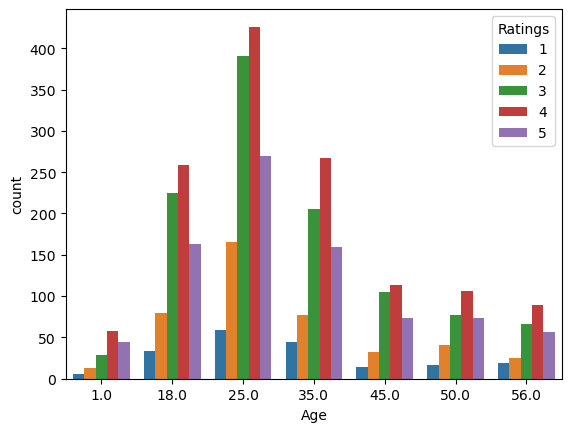

In [26]:
sns.countplot(x="Age",hue="Ratings",data=data)

In [27]:
groupedby_movieName = data.groupby('MovieName')
groupedby_rating = data.groupby('Ratings')
groupedby_uid = data.groupby('UserID')

In [28]:
movies = data.groupby('MovieName').size().sort_values(ascending=True)[:1000]
print(movies)

MovieName
$1,000,000 Duck (1971)                   1
Only Angels Have Wings (1939)            1
Only You (1994)                          1
Open Season (1996)                       1
Open Your Eyes (Abre los ojos) (1997)    1
                                        ..
Toy Story 2 (1999)                       1
Toys (1992)                              1
Total Eclipse (1995)                     1
Trading Places (1983)                    1
Tom & Viv (1994)                         1
Length: 1000, dtype: int64


In [29]:
ToyStory_data = groupedby_movieName.get_group('Toy Story 2 (1999)')
ToyStory_data.shape

(1, 9)

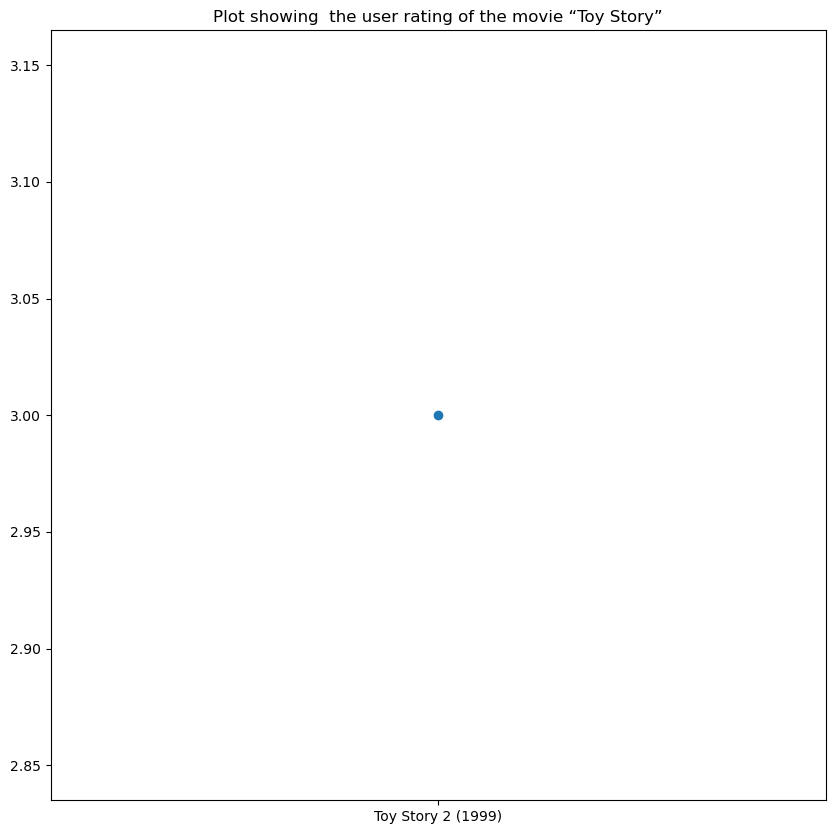

In [30]:
#Find and visualize the user rating of the movie “Toy Story”
plt.figure(figsize=(10,10))
plt.scatter(ToyStory_data['MovieName'],ToyStory_data['Ratings'])
plt.title('Plot showing  the user rating of the movie “Toy Story”')
plt.show()

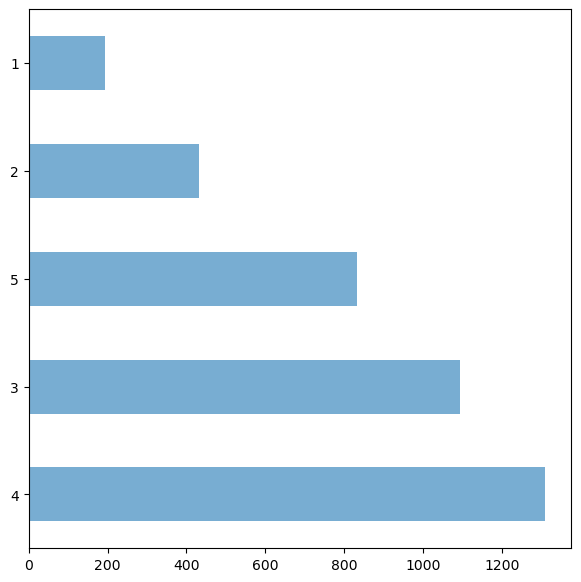

In [31]:
#Find and visualize the top 25 movies by viewership rating
top_25 = data[25:]
top_25['Ratings'].value_counts().plot(kind='barh',alpha=0.6,figsize=(7,7))
plt.show()


In [32]:
#Visualize the rating data by user of user id = 2696
userid_2696 = groupedby_uid.get_group(2696)
userid_2696[['UserID','Ratings']]

,UserID,Ratings
2694,2696.0,3


In [33]:
data.columns

Index(['MovieIDs', 'MovieName', 'Category', 'ID', 'MovieID', 'Ratings',
       'UserID', 'Gender', 'Age'],
      dtype='object')

In [34]:
data.head()

,MovieIDs,MovieName,Category,ID,MovieID,Ratings,UserID,Gender,Age
0,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,2.0,0,56.0
1,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,3.0,0,25.0
2,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,4.0,0,45.0
3,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,5.0,0,25.0
4,6.0,Heat (1995),Action|Crime|Thriller,1,1197,3,6.0,1,50.0


In [35]:
data_500 = data[500:]
data_500.dropna(inplace=True)

In [67]:
x=data_500[['MovieID','ID','UserID','Gender','Age']]

In [68]:
x.head()

,MovieID,ID,UserID,Gender,Age
500,17,6,502.0,0,35.0
501,3699,6,503.0,0,35.0
502,1441,6,504.0,0,25.0
503,1088,6,505.0,0,35.0
504,912,6,506.0,0,25.0


In [38]:
y=data_500['Ratings']

In [39]:
y.head()

500    4
501    4
502    4
503    5
504    4
Name: Ratings, dtype: int64

# <font color="blue"> Splitting Data into training and testing

In [40]:
from sklearn.model_selection import train_test_split

In [71]:
train, test, train_y, test_y = train_test_split(x,y,test_size=0.33,random_state=42)

# <font color="blue"> Models Training

## Logistic Regression

In [72]:
from sklearn.linear_model import LogisticRegression

In [74]:
logreg = LogisticRegression()
logreg.fit(train, train_y)
Y_pred = logreg.predict(test)
acc_log = round(logreg.score(train, train_y) * 100, 2)
acc_log

34.13

## Decision Tree

In [56]:
from sklearn.tree import DecisionTreeClassifier

In [75]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train, train_y)
Y_pred = decision_tree.predict(test)
acc_decision_tree = round(decision_tree.score(train, train_y) * 100, 2)
acc_decision_tree

100.0

## Random Forest

In [76]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(train, train_y)
Y_pred = random_forest.predict(test)
random_forest.score(train, train_y)
acc_random_forest = round(random_forest.score(train, train_y) * 100, 2)
acc_random_forest

100.0

In [78]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','Decision Tree', 
              'Random Forest'],
    'Score': [acc_log, acc_decision_tree,
              acc_random_forest]})

In [79]:
models

,Model,Score
0,Logistic Regression,34.13
1,Decision Tree,100.00
2,Random Forest,100.00


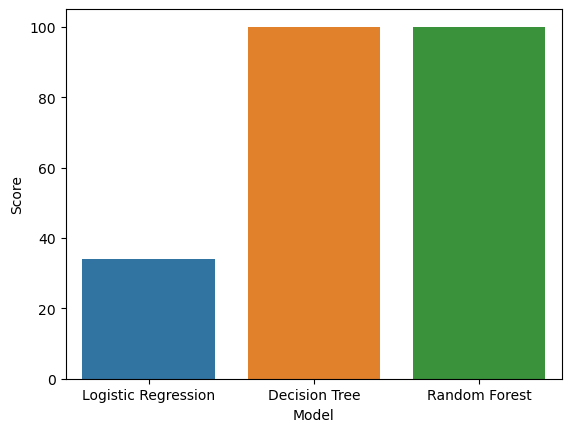

In [80]:
sns.barplot(x=models["Model"],y=models["Score"])
plt.show()